In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools


In [2]:
data = pd.read_csv('alliance_v4.1_by_directed_yearly.csv')
df = data.copy(deep=True)
df.head()

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1816,4.1
1,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1817,4.1
2,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1818,4.1
3,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1819,4.1
4,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1820,4.1


In [3]:
# 1975-1990
df75_90 = df[df['year']>1960]
df75_90 = df75_90[df75_90['year']<1975]

df75_90 = df75_90[['state_name1','state_name2','year']]

df75_90_group_by = df75_90.groupby(['state_name1','state_name2']).agg({'year': 'count'})
df75_90_group_by = df75_90_group_by.rename(columns={'year': 'count'})
df75_90_group_by = df75_90_group_by.reset_index()
df75_90_group_by

,state_name1,state_name2,count
0,Afghanistan,China,14
1,Afghanistan,Russia,14
2,Albania,Bulgaria,15
3,Albania,Czechoslovakia,8
4,Albania,German Democratic Republic,8
...,...,...,...
1639,Yemen People's Republic,Tunisia,8
1640,Yemen People's Republic,United Arab Emirates,7
1641,Yemen People's Republic,Yemen Arab Republic,8
1642,Yugoslavia,Greece,7


In [4]:
df75_90_group_by

,state_name1,state_name2,count
0,Afghanistan,China,14
1,Afghanistan,Russia,14
2,Albania,Bulgaria,15
3,Albania,Czechoslovakia,8
4,Albania,German Democratic Republic,8
...,...,...,...
1639,Yemen People's Republic,Tunisia,8
1640,Yemen People's Republic,United Arab Emirates,7
1641,Yemen People's Republic,Yemen Arab Republic,8
1642,Yugoslavia,Greece,7


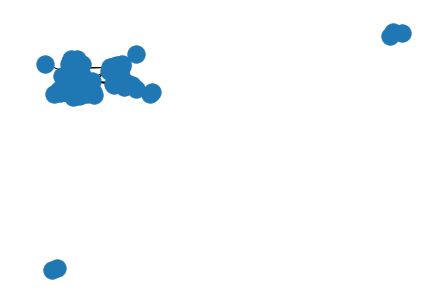

In [10]:
edge_weight = {}
for i in range(len(df75_90_group_by)):
    key = (df75_90_group_by['state_name1'][i],df75_90_group_by['state_name2'][i])
    edge_weight[key] = df75_90_group_by['count'][i]
    
edge_list=[]
weight_list=[]
for i in edge_weight:
    edge_list.append(i)
    weight_list.append(edge_weight[i])

pos_graph = nx.Graph()

for i in range(len(edge_list)):
    pos_graph.add_edge(edge_list[i][0], edge_list[i][1], weight=int(weight_list[i]))
    
#nx.info(pos_graph)
nx.draw(pos_graph)

In [11]:

weights = nx.get_edge_attributes(pos_graph, 'weight')
weights

{('Afghanistan', 'China'): 14,
 ('Afghanistan', 'Russia'): 14,
 ('China', 'Cambodia'): 13,
 ('China', 'Canada'): 3,
 ('China', 'France'): 3,
 ('China', 'India'): 3,
 ('China', 'Myanmar'): 10,
 ('China', 'North Korea'): 14,
 ('China', 'Poland'): 3,
 ('China', 'Republic of Vietnam'): 3,
 ('China', 'Russia'): 17,
 ('China', 'Thailand'): 3,
 ('China', 'United Kingdom'): 3,
 ('China', 'United States of America'): 3,
 ('China', 'Vietnam'): 3,
 ('Russia', 'Albania'): 8,
 ('Russia', 'Bulgaria'): 28,
 ('Russia', 'Cambodia'): 3,
 ('Russia', 'Canada'): 7,
 ('Russia', 'Czechoslovakia'): 28,
 ('Russia', 'Egypt'): 4,
 ('Russia', 'Finland'): 14,
 ('Russia', 'France'): 8,
 ('Russia', 'German Democratic Republic'): 25,
 ('Russia', 'Hungary'): 14,
 ('Russia', 'India'): 7,
 ('Russia', 'Iraq'): 3,
 ('Russia', 'Mongolia'): 14,
 ('Russia', 'Myanmar'): 3,
 ('Russia', 'North Korea'): 14,
 ('Russia', 'Poland'): 31,
 ('Russia', 'Republic of Vietnam'): 3,
 ('Russia', 'Romania'): 28,
 ('Russia', 'Thailand'): 3,
 

In [12]:
#nx.write_gml(pos_graph, "network75_90.gml")

In [13]:
#1995-2010

df95_10 = df[df['year']>1995]
df95_10 = df95_10[df95_10['year']<2010]

df95_10 = df95_10[['state_name1','state_name2','year']]

df95_10_group_by = df95_10.groupby(['state_name1','state_name2']).agg({'year': 'count'})
df95_10_group_by = df95_10_group_by.rename(columns={'year': 'count'})
df95_10_group_by = df95_10_group_by.reset_index()
df95_10_group_by.head()

,state_name1,state_name2,count
0,Afghanistan,China,8
1,Afghanistan,Iran,8
2,Afghanistan,Pakistan,8
3,Afghanistan,Tajikistan,8
4,Afghanistan,Turkmenistan,8


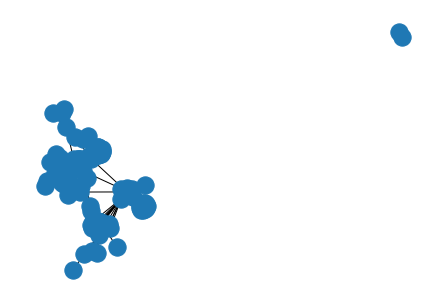

In [14]:
edge_weight = {}
for i in range(len(df95_10_group_by)):
    key = (df95_10_group_by['state_name1'][i],df95_10_group_by['state_name2'][i])
    edge_weight[key] = df95_10_group_by['count'][i]
    
edge_list=[]
weight_list=[]
for i in edge_weight:
    edge_list.append(i)
    weight_list.append(edge_weight[i])

pos_graph = nx.Graph()

for i in range(len(edge_list)):
    pos_graph.add_edge(edge_list[i][0], edge_list[i][1], weight=int(weight_list[i]))
    

nx.draw(pos_graph)

In [12]:
nx.number_of_nodes(pos_graph)
#nx.number_of_edges(pos_graph)


145

In [15]:
nx.write_gml(pos_graph, "95_10_network.gml")

In [16]:
# total graph
df

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1816,4.1
1,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1817,4.1
2,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1818,4.1
3,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1819,4.1
4,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1820,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148253,414,666,Israel,2,United States of America,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,1987,4.1
148254,414,666,Israel,2,United States of America,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,1988,4.1
148255,414,666,Israel,2,United States of America,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,1989,4.1
148256,414,666,Israel,2,United States of America,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,1990,4.1


In [17]:
df=df[['state_name1','state_name2','year']]

df_group_by=df.groupby(['state_name1','state_name2']).agg({'year':'count'})
df_group_by=df_group_by.rename(columns={'year':'count'}).reset_index()
df_group_by

,state_name1,state_name2,count
0,Afghanistan,China,31
1,Afghanistan,Iran,47
2,Afghanistan,Iraq,19
3,Afghanistan,Pakistan,13
4,Afghanistan,Russia,54
...,...,...,...
3383,Zambia,Tanzania,7
3384,Zambia,Uganda,7
3385,Zimbabwe,Angola,3
3386,Zimbabwe,Congo,3


In [18]:
import networkx as nx

edge_weight = {}
for i in range(len(df_group_by)):
    key = (df_group_by['state_name1'][i],df_group_by['state_name2'][i])
    edge_weight[key] = df_group_by['count'][i]
    
edge_list=list(edge_weight.keys())
weight_list=list(edge_weight.values())

pos_graph=nx.Graph()

for i in range(len(df_group_by)):
    pos_graph.add_edge(edge_list[i][0], edge_list[i][1], weight=int(weight_list[i]))




In [19]:
nx.write_gml(pos_graph, "alliance_total.gml")